# Группировка клиентов

In [142]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [52]:
def customers_group(customer_id:str):
    group = sum(list(map(int, list(customer_id)))) 
    return group

list(customer_id) разобьёт строку как split; map(int, list(customer_id)) - подействует на каждый элемент list(customer_id) функцией int(); так как map() возвращает объект iterable, то преобразуем его в list для которого существует метод sum()

# Диагностические функции

In [60]:
def template_for_functions(init, end):            #специальный шаблон для диагностических функций
    group_result = {}                             #заводим словарь, где будем хранить сколько человек принадлежат каждой группе
    for num in range(init, end):                  #проходимся по всем клиентам с начального (init) id до конечного (end) id 
        group_number = customers_group(str(num))  #находим номер группы с помощью функции группировки клиентов
        if group_number not in group_result:      #проверяем наличие ключа в словаре
            group_result[group_number] = 1        #если его нет, добавляем его со значением 1
        else:
            group_result[group_number] += 1       #если он есть, то добавляем к значению 1
    return group_result

In [61]:
#используя шаблонную функцию, находим распределение клиентов с id = 0.....
def func_id_with_zero(n_customers:int):
    return template_for_functions(0, n_customers) 

In [65]:
#используя шаблонную функцию, находим распределение клиентов с любым id
def func_id_with_any(n_customers:int, n_first_id:int):
    return template_for_functions(n_first_id, n_first_id + n_customers)

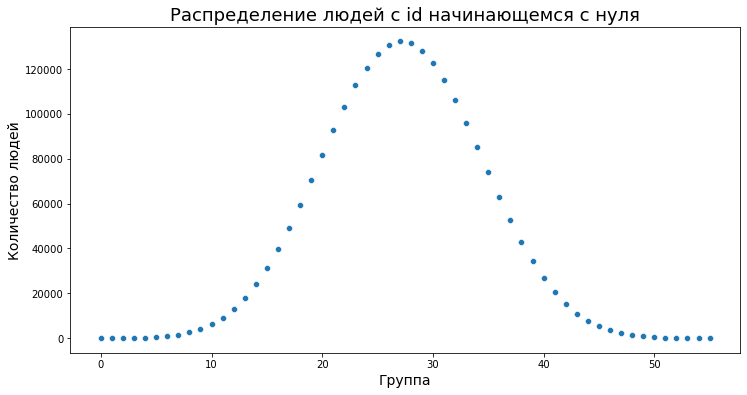

In [143]:
df = pd.DataFrame(func_id_with_zero(2375777), index=[0]).T
plt.figure(figsize=(12, 6))
sns.scatterplot(x = df.index, y=df[0]);
plt.title('Распределение людей с id начинающемся с нуля', fontsize=18)
plt.xlabel('Группа', fontsize=14);
plt.ylabel('Количество людей', fontsize=14);

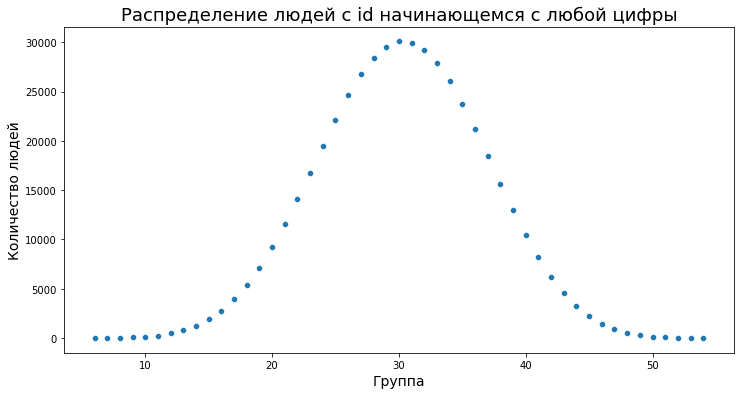

In [146]:
df = pd.DataFrame(func_id_with_any(500000, 2375777), index=[0]).T
plt.figure(figsize=(12, 6))
sns.scatterplot(x = df.index, y=df[0]);
plt.title('Распределение людей с id начинающемся с любой цифры', fontsize=18)
plt.xlabel('Группа', fontsize=14);
plt.ylabel('Количество людей', fontsize=14);